# Kamień Milowy 3

## TLDR 

**Interpretability Beyond Feature Attribution: Quantitative Testing with Concept Activation Vectors (TCAV)**

*Been Kim, Martin Wattenberg, Justin Gilmer, Carrie Cai, James Wexler, Fernanda Viegas, Rory Sayres*

https://arxiv.org/abs/1711.11279

W artykule wprowadzono pomysł wyjaśnień opartych na konceptach. Potrzebne do tego są dwa zbiory, jeden zawierający przykłady konceptu, drugi który nie zawiera przykładów konceptu. Aby uzyskać Concept Activation Vector (CAV), z modelu wyłuskujemy wartości aktywacji z dowolnej warstwy. Wyznaczamy liniową granicę decyzyjną pomiędzy zbiorami w takiej reprezentacji. CAV to wektor prostopadły do tej granicy.

Zalety:
+ w czasie projektowania i treningu sieci nie musimy wyznaczać konceptów. Definiuje je użytkownik końcowy tworząc dwa zbiory przykładów
+ wg autorów wyjaśnienia uzyskane w ten sposób są bardziej zrozumiałe dla ludzi

Wady:
+ skuteczność metody zależy od wyboru zbiorów przykładów
+ podatność na manipulacje poprzez komponowanie odpowiednich zbiorów przykładów

**Can We Do Better Than Random Start? The Power of Data Outsourcing**

*YI CHEN, JING DONG, XIN T. TONG*

https://arxiv.org/pdf/2205.08098.pdf

W artykule zostały przedstawione 3 algorytmy służące do znajdowania punktów startowych do rozpoczęcia algorytmów uczenia. Są nimi: Sampling-based Initial Point Selection (SIPS), Optimization-based Initial Point Selection (OIPS) oraz OIPS-SAO. Losowe wybór punktów niesie za sobą ryzyka, np. utknięcie w lokalnym minimum i nie znalezienie globalnego. Opracowane na podstawie statystycznych twierdzeń algorytmy sprawdzają się dużo lepiej. Autorzy przedstawiają teoretyczne uzasadnienie, jak i przykładowy test z wizualizacją, które potwierdzają ich skuteczność. Jednakże, zostały one potwierdzone przy spełnieniu ustalonych przez nich założeń, podczas gdy w rzeczywistości sytuacje nie są tak klarowne. Zaprezentowane algorytmy mają działać na małej próbce danych by koszt ich użycia był niewielki. Problem został połączony z data outsourcingiem, w którym ilość danych otrzymanych do pracy jest odgórnie narzucona.


**It takes a lot of energy for machines to learn – here’s why AI is so power-hungry**

*Kate Saenko*

https://theconversation.com/it-takes-a-lot-of-energy-for-machines-to-learn-heres-why-ai-is-so-power-hungry-151825

Artykuł porusza problem zużycia energi przy trenowaniu modeli bazujących na samouczeniu. Autorka stawia tezę dyskredytującą aktualne techniki trenowania modelu, uważając je za nieefektywne. Porównując je z działaniem mózgu człowieka, przytacza przykład modelu BERT analizującego język, w którym maszyna potrzebowała kilka tysięcy razy większej ilości danych oraz przejścia po nich kilkadziesiąt razy by otrzymać zadawalające rezultaty. Wyliczono, że model ten, przetwarzając 3.3 miliarda słów z książek i artykułów z Wikipedii, miał ślad węglowy porównywalny z przelotem Boeinga 747 z Nowego Yorku do San Francisco i z powrotem.

 Autorka przedstawia również kolejną szkodliwą dla środowiska technikę rozbudowywania modeli do ogromnych rozmiarów, dającą dodatkowy procent skuteczności, mimo tego, że większość neuronów jest w tym modelu nieaktywnych.

W przyszłości jest szansa na zmiejszynie zużycia energetycznego dzięki opracowaniu lepszych algorytmów i bardziej optymalnych metod uczenia.

## Szablon sekcji raportu

*Abstract*
1. Introduction
- interpretability for image classification
- related work (mention KP, shap, lime, Axiomatic Attribution for Deep Networks(IG))
2. Methods
- trained models (resnet-18 and mobilenet)
3. Results
- comparison of resnet 18 explanations and mobilenet explanations on the same samples
5. Conclusion

## Wyjaśnienia MobileNet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = torchvision.datasets.ImageFolder('../content/challenge-nr-1/', transform=transform)

In [ ]:
#/kaggle/input/kandinskychallange/challenge-nr-1/
#/kaggle/input/km2-2022l-wb/model/mobileNet.pth

In [9]:
PATH = '../content/mobileNet.pth'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = torchvision.models.mobilenet_v3_small().to(device)
model.classifier[3] = nn.Linear(1024, 3)
model.load_state_dict(torch.load(PATH))
model.eval()
model = model.to(device)

In [2]:
!pip install captum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 9.5 MB/s 


In [3]:
from captum.attr import Lime, visualization
from skimage import segmentation

In [ ]:
def get_img(idx, dataset=dataset):
    return dataset[idx][0].to(device), dataset[idx][1]

img, clss = get_img(100)
img = img.unsqueeze(0).to(device)
img, clss

In [48]:
def get_img(idx, dataset=dataset):
    return dataset[idx][0].to(device), dataset[idx][1]

img, clss = get_img(0)
img = img.unsqueeze(0).to(device)
img, clss

(tensor([[[[0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           ...,
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508],
           [0.4508, 0.4508, 0.4508,  ..., 0.4508, 0.4508, 0.4508]],
 
          [[0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           ...,
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903],
           [0.5903, 0.5903, 0.5903,  ..., 0.5903, 0.5903, 0.5903]],
 
          [[0.8099, 0.8099, 0.8099,  ..., 0.8099, 0.8099, 0.8099],
           [0.8099, 0.8099, 0.8099,  ..., 0.8099, 0.8099, 0.8099],
           [0.8099, 0.80

In [11]:
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, num_workers=2, shuffle=False)

In [ ]:
test_preds = torch.tensor([])

with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloader):
        if i % 20 == 0:
            print(i)
        preds = model(inputs.to(device))
        test_preds = torch.cat((test_preds.to("cpu"), preds.to("cpu")), dim=0)

0
20
40
60
80


In [ ]:
predicted = torch.argmax(test_preds, dim=1)
labels = torch.tensor([0]*1000 + [1] * 1000 + [2] * 1000)
missed = torch.nonzero(predicted - labels)
missed

tensor([[ 46],
        [ 59],
        [104],
        [118],
        [195],
        [202],
        [217],
        [246],
        [298],
        [309],
        [322],
        [400],
        [410],
        [497],
        [516],
        [581],
        [585],
        [594],
        [650],
        [685],
        [897],
        [924],
        [927],
        [984]])

In [ ]:
torch.cat((predicted[missed], labels[missed]), dim=1)

tensor([[2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0],
        [2, 0]])

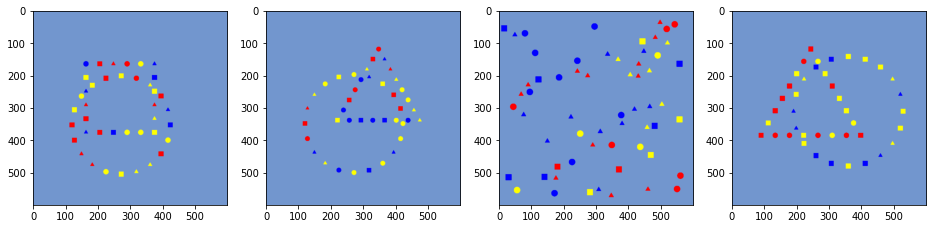

In [ ]:
obs = [46, 120, 1345, 2593]
fig, ax = plt.subplots(1, 4, figsize=[16, 8])
for i in range(4):
    ax[i].imshow(get_img(obs[i])[0].cpu().permute(1,2,0))

### LIME

In [65]:
def mask(i):
    return segmentation.quickshift(
        get_img(i)[0].permute(1, 2, 0).cpu().double(), 
        kernel_size=5, 
        max_dist=7, 
        ratio=0.7)

def show_attr(attr_map):
    visualization.visualize_image_attr(
        attr_map.permute(1, 2, 0).cpu().numpy(),
        method='heat_map',
        sign='all',
        show_colorbar=True
    )

In [67]:
def my_segmentation(image):
    im_array = image.cpu().numpy()
    masks = np.zeros_like(im_array[0])
    masks[0,0] = 1
    segment_nb = 1

    for index, val in np.ndenumerate(masks):
        if index[1] > 0:
            # up
            if (im_array[:, index[0], index[1]-1] - im_array[:, index[0], index[1]] < 0.1).all():
                masks[index] = masks[index[0], index[1]-1]
        if index[0] > 0:
            # left
            if (im_array[:, index[0]-1, index[1]] - im_array[:, index[0], index[1]] < 0.1).all():
                masks[index] = masks[index[0]-1, index[1]]

        if masks[index] == 0:
            segment_nb += 1
            masks[index] = segment_nb

    masks = np.transpose(masks)
    masks[((np.transpose(im_array) - np.array((0.4508, 0.5903, 0.8099)) < 0.0001).sum(axis=2) == 3)] = 1
    return masks.astype(np.compat.long)

In [ ]:
get_img(1)[1]
seg = my_segmentation(get_img(1)[0])

In [68]:
baselines = (0.4508, 0.5903, 0.8099) # baseline po normalizacji
baselines = torch.tensor(np.stack([np.full((600,600), baselines[0]), 
                                   np.full((600,600), baselines[1]), 
                                   np.full((600,600), baselines[2])])).float().to(device)

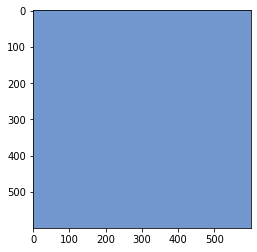

In [ ]:
plt.imshow(baselines.cpu().permute(1,2,0).numpy())

46


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 155.12it/s]


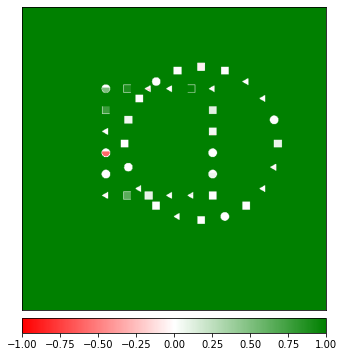

120


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 155.95it/s]


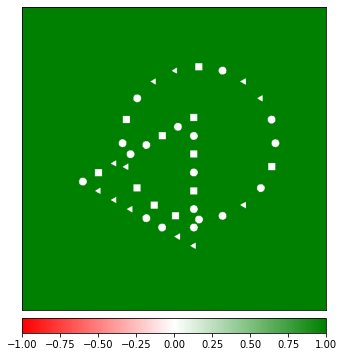

1345


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 151.55it/s]


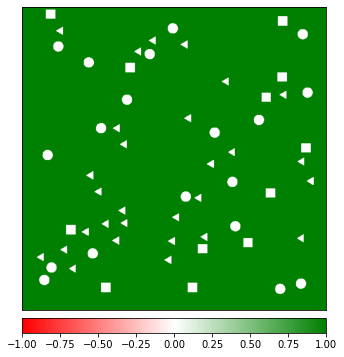

2593


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Lime attribution: 100%|██████████| 200/200 [00:01<00:00, 128.55it/s]


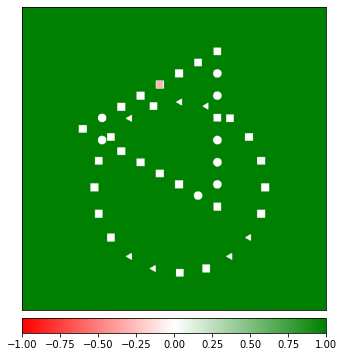

In [ ]:
exp_lime = Lime(model)
def attr_lime(i):
    return exp_lime.attribute(
        get_img(i)[0].unsqueeze(0), 
        target=get_img(i)[1], 
        n_samples=200, 
        feature_mask=torch.as_tensor(my_segmentation(get_img(i)[0])).to(device),
        show_progress=True,
        baselines = baselines)
for o in obs:
    print(o)
    show_attr(attr_lime(o)[0])

### Shap

In [63]:
from captum.attr import KernelShap

46


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:06<00:00, 148.40it/s]


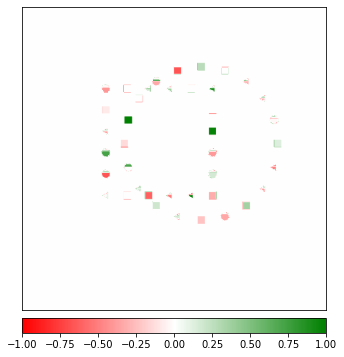

120


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:06<00:00, 149.43it/s]


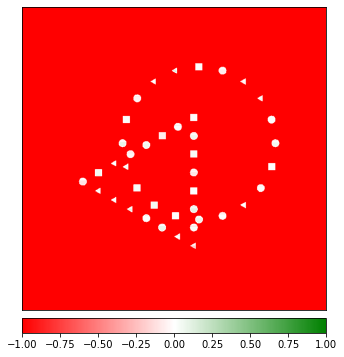

1345


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:06<00:00, 152.34it/s]


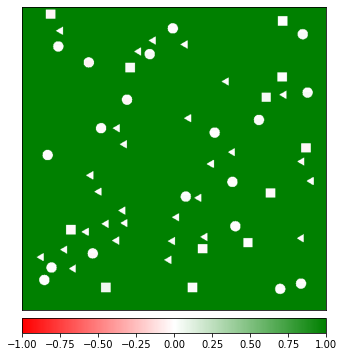

2593


/opt/conda/lib/python3.7/site-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:06<00:00, 151.16it/s]


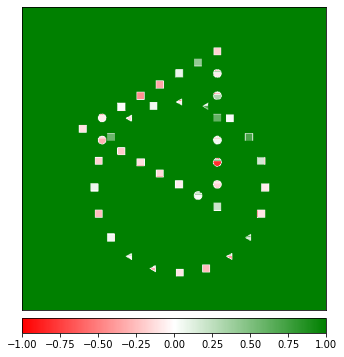

In [ ]:
exp_shap = KernelShap(model)
def attr_shap(i):
    return exp_shap.attribute(
        inputs = get_img(i)[0].unsqueeze(0), 
        target=get_img(i)[1], 
        n_samples=1000, 
        feature_mask=torch.as_tensor(my_segmentation(get_img(i)[0])).to(device),
        show_progress=True,
        baselines = baselines)
for o in obs:
    print(o)
    show_attr(attr_shap(o)[0])

### Saliency

In [ ]:
from captum.attr import Saliency

In [ ]:
exp_saliency = Saliency(model)

46


/opt/conda/lib/python3.7/site-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


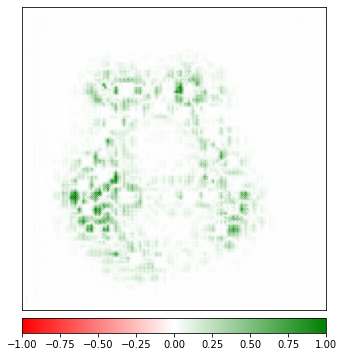

120


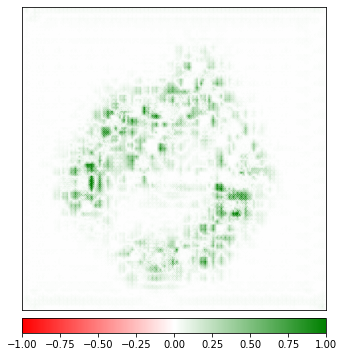

1345


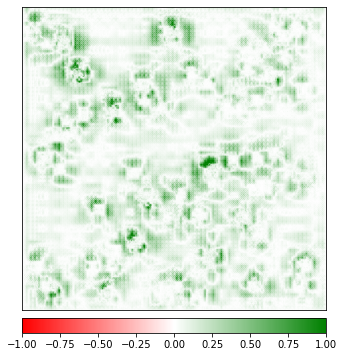

2593


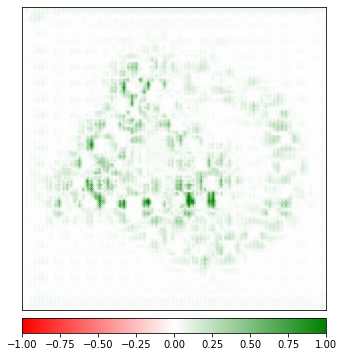

In [ ]:
def attr_sailency(i):
    return exp_saliency.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1])

for o in obs:
    print(o)
    show_attr(attr_sailency(o)[0])

### Integrated Gradients

In [ ]:
from captum.attr import IntegratedGradients
exp_ig = IntegratedGradients(model)

46


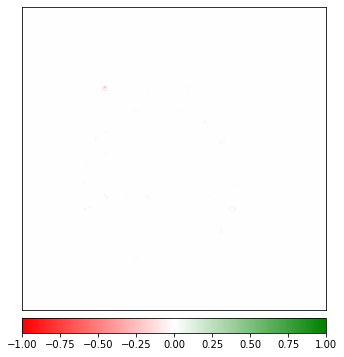

120


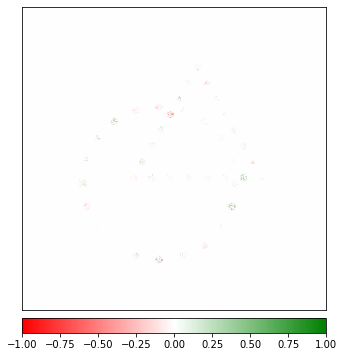

1345


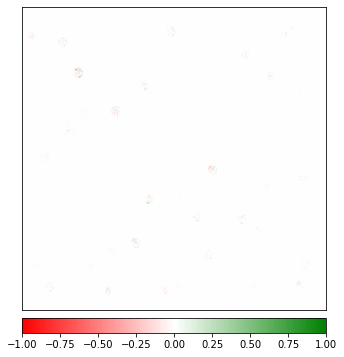

2593


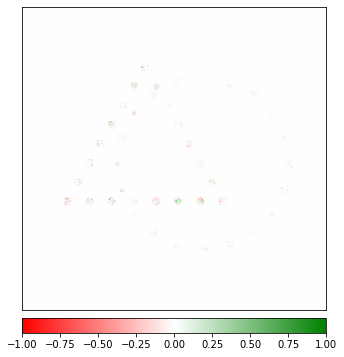

In [ ]:
def attr_ig(i):
    return exp_ig.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1],
    baselines=baselines.unsqueeze(0))
for o in obs:
    print(o)
    show_attr(attr_ig(o)[0])

### InputXGradient

In [ ]:
from captum.attr import InputXGradient
ixg_exp = InputXGradient(model)

def attr_ixg(i):
    return ixg_exp.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1])

46


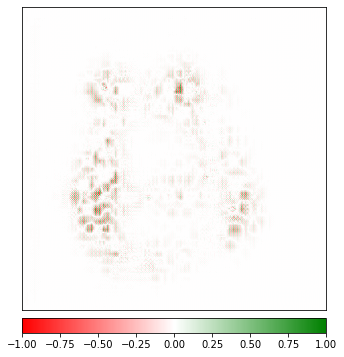

120


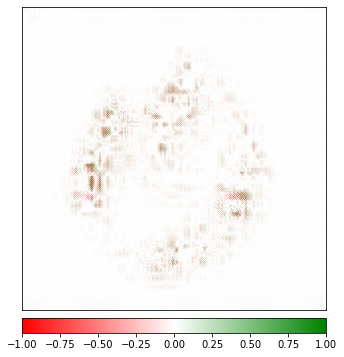

1345


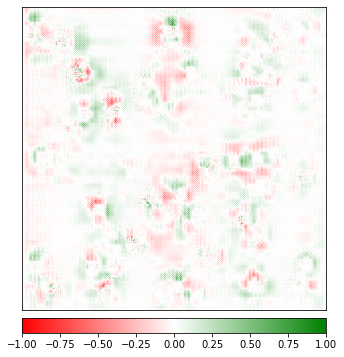

2593


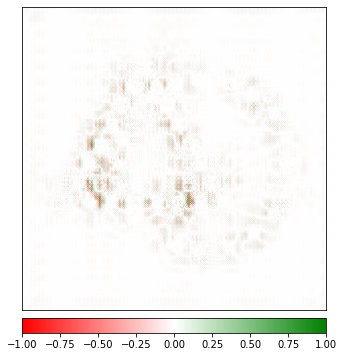

In [ ]:
for o in obs:
    print(o)
    show_attr(attr_ixg(o)[0].detach())

### Gradient Shap

In [ ]:
from captum.attr import GradientShap
gshap_exp = GradientShap(model)

def attr_gshap(i):
    return gshap_exp.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1],
    stdevs=0.0001,
    baselines=baselines.unsqueeze(0))

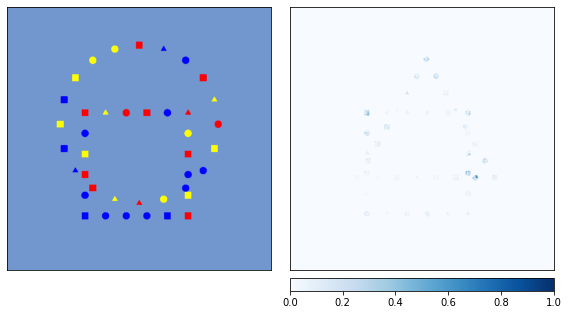

In [ ]:
attributions_gs = attr_gshap(1)[0]
_ = visualization.visualize_image_attr_multiple(np.transpose(attributions_gs.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "absolute_value"],
                                      show_colorbar=True)

46


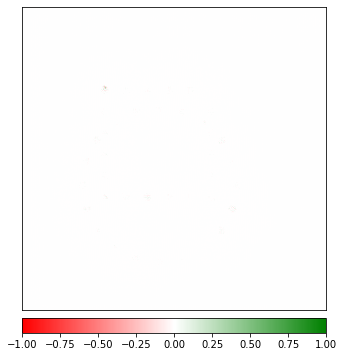

120


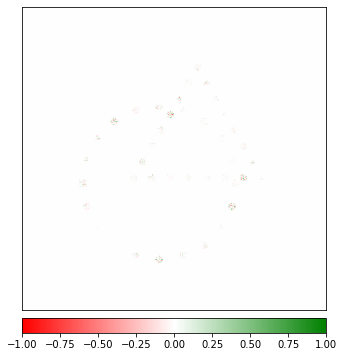

1345


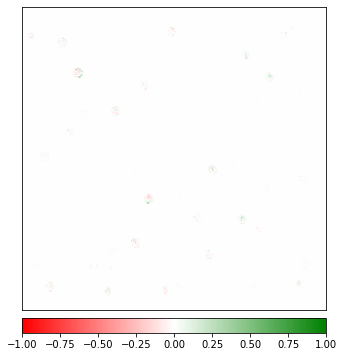

2593


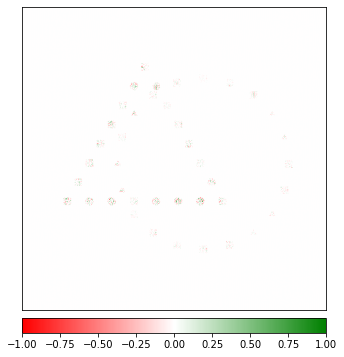

In [ ]:
for o in obs:
    print(o)
    show_attr(attr_gshap(o)[0])

## Wyjaśnienia, a modyfikacja zdjęcia

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


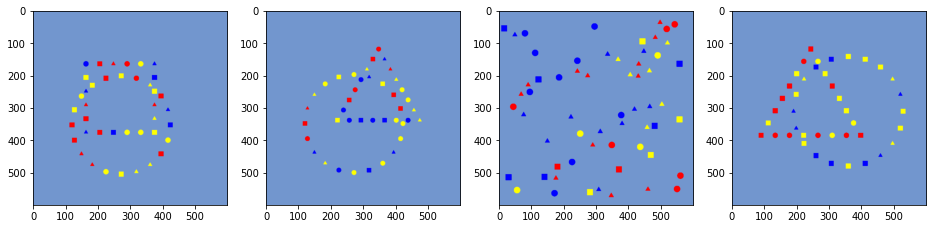

In [13]:
obs = [46, 120, 1345, 2593]
fig, ax = plt.subplots(1, 4, figsize=[16, 8])
for i in range(4):
    ax[i].imshow(get_img(obs[i])[0].cpu().permute(1,2,0))

In [15]:
@torch.no_grad()
def get_all_preds(model, loader):
  all_preds = torch.tensor([]).to(device)
  for batch in loader:
    images = batch[0].to(device)
    labels = batch[1].to(device)
    preds = model(images)
    all_preds = torch.cat((all_preds, preds) ,dim=0).to(device)

  return all_preds

test_preds = get_all_preds(model, dataloader)

In [16]:
p = test_preds.argmax(dim=1)

In [21]:
p[2593]==2

tensor(True, device='cuda:0')

In [32]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = torchvision.datasets.ImageFolder('../content/test1/', transform=transform)

In [33]:
dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, num_workers=2, shuffle=False)

In [34]:
test_preds = get_all_preds(model, dataloader)

In [42]:
p = test_preds.argmax(dim=1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


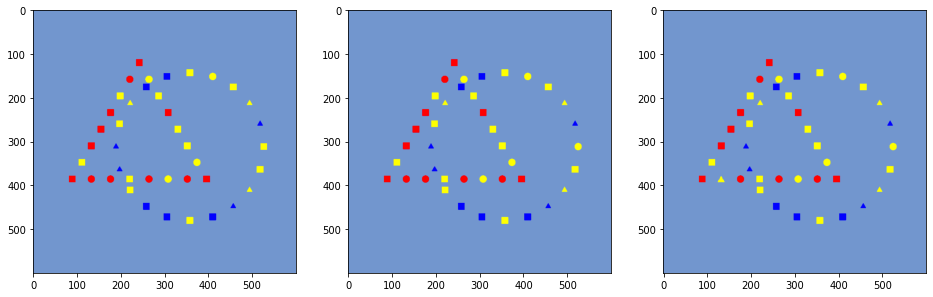

In [56]:
obs = [0,1,2,3,4,5]
fig, ax = plt.subplots(1, 3, figsize=[16, 8])
for i in range(3):
    ax[i].imshow(get_img(obs[i])[0].cpu().permute(1,2,0))


In [57]:

for i in range(3):
    ax[i].imshow(get_img(obs[i+3])[0].cpu().permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2, device='cuda:0')
tensor(2, device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2, device='cuda:0')
tensor(2, device='cuda:0')
tensor(1, device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(2, device='cuda:0')


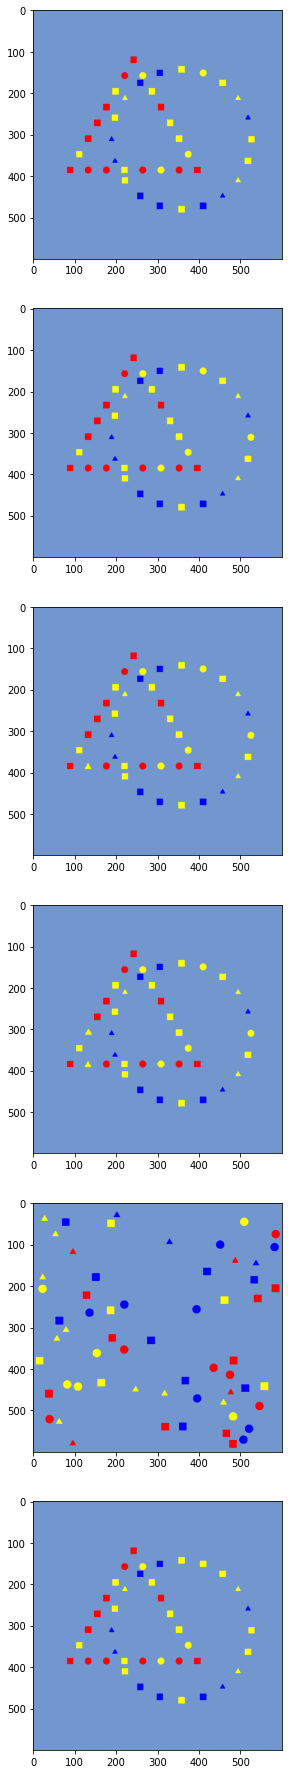

In [61]:
fig, ax = plt.subplots(6, 1, figsize=[8, 32])
for o in obs:
    print(p[o])
    ax[o].imshow(get_img(obs[o])[0].cpu().permute(1,2,0))

0


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:07<00:00, 126.51it/s]


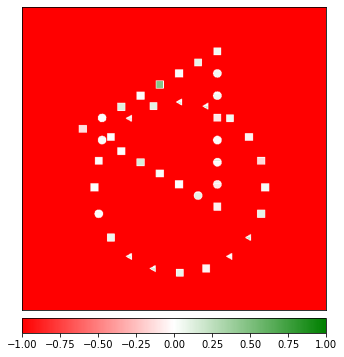

1


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:07<00:00, 128.13it/s]


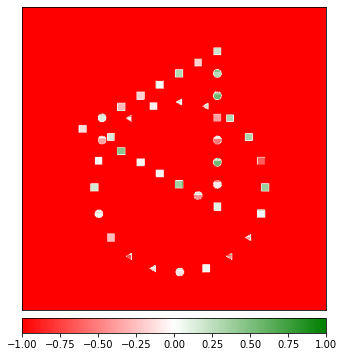

2


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:07<00:00, 128.27it/s]


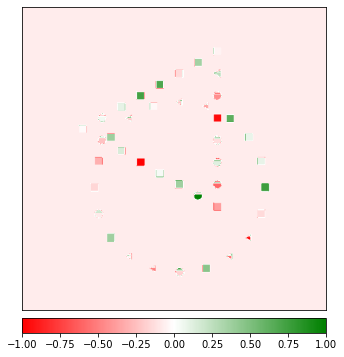

3


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:07<00:00, 128.93it/s]


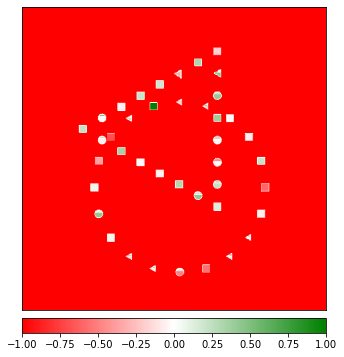

4


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:07<00:00, 128.51it/s]


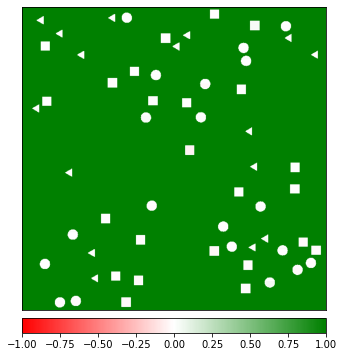

5


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:07<00:00, 128.28it/s]


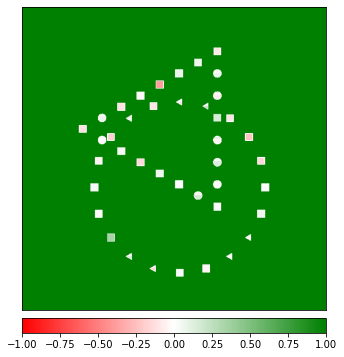

In [69]:
exp_shap = KernelShap(model)
def attr_shap(i):
    return exp_shap.attribute(
        inputs = get_img(i)[0].unsqueeze(0), 
        target=get_img(i)[1], 
        n_samples=1000, 
        feature_mask=torch.as_tensor(my_segmentation(get_img(i)[0])).to(device),
        show_progress=True,
        baselines = baselines)
for o in obs:
    print(o)
    show_attr(attr_shap(o)[0])

## Saliency Test - data randomization test

### Wczytanie danych - mixed labels

In [31]:
!jar xvf test1.zip

  created: test1/counterfactual/
 inflated: test1/counterfactual/00001.png
 inflated: test1/counterfactual/00002.png
 inflated: test1/counterfactual/00003.png
 inflated: test1/counterfactual/00004.png
  created: test1/false/
 inflated: test1/false/000066.png
  created: test1/true/
 inflated: test1/true/00000.png


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

dataset = torchvision.datasets.ImageFolder('../content/challenge-nr-1-test/', transform=transform)

In [ ]:
len_train_dataset=2500
len_test_dataset=500
data_test, data_train = torch.utils.data.random_split(dataset, [len_test_dataset, len_train_dataset])
test_dataloader  = torch.utils.data.DataLoader(dataset=data_test, batch_size=16, shuffle=True)
train_dataloader  = torch.utils.data.DataLoader(dataset=data_train, batch_size=16, shuffle=True)

### Budowa modelu

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

resnet18 = models.resnet18(pretrained=True)
resnet18.fc=nn.Linear(512, 3)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = resnet18.to(device)
params_to_update = model_ft.parameters()
optimizer = optim.AdamW(params_to_update, lr=0.001, weight_decay=0.25)
criterion = nn.CrossEntropyLoss()
n_epoch = 3

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
train_results = []
test_results = []
for epoch in range(n_epoch):
        print('Epoch {}/{}'.format(epoch + 1, n_epoch))
        print('-' * 10)

        model_ft.train()
        train_loss = 0
        train_correct = 0
        for inputs, labels in train_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model_ft(inputs)
            loss = criterion(outputs, labels)
            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()
            loss.backward()
            optimizer.step()

        model_ft.eval()
        test_loss = 0
        test_correct = 0
        for inputs, labels in test_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model_ft(inputs)
            batch_loss = criterion(outputs, labels).item()
            with torch.no_grad():
                test_loss += batch_loss
                test_correct += (outputs.argmax(1) == labels).type(torch.float).sum().item()

        test_acc = test_correct / len_test_dataset
        train_acc = train_correct / len_train_dataset
        train_results += [{'loss': train_loss, 'acc': train_acc}]
        test_results += [{'loss': test_loss, 'acc':test_acc}]

Epoch 1/3
----------
Epoch 2/3
----------
Epoch 3/3
----------


### Analiza wytrenowania

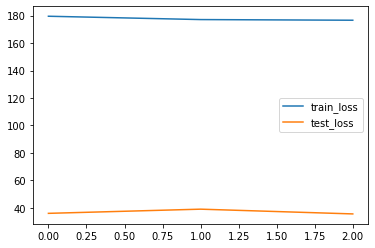

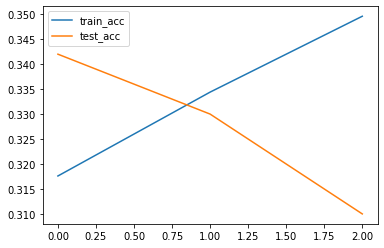

In [ ]:
train_df = pd.DataFrame(train_results)
train_df.columns = ['train_' + col for col in train_df.columns]
test_df = pd.DataFrame(test_results)
test_df.columns = ['test_' + col for col in test_df.columns]

pd.concat([train_df, test_df], axis=1).loc[:,['train_loss', 'test_loss']].plot()
pd.concat([train_df, test_df], axis=1).loc[:,['train_acc', 'test_acc']].plot()

### Wyjaśnienia

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


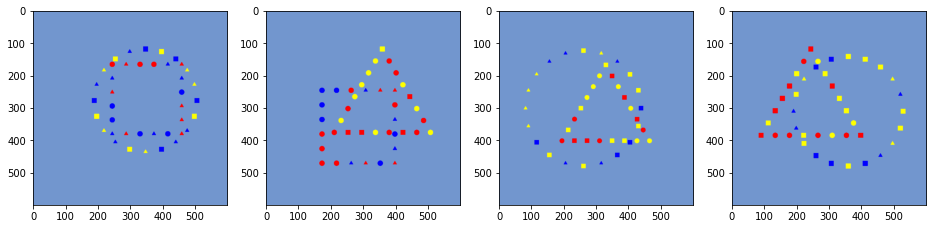

In [ ]:
obs = [46, 120, 1345, 2593]
fig, ax = plt.subplots(1, 4, figsize=[16, 8])
for i in range(4):
    ax[i].imshow(get_img(obs[i])[0].cpu().permute(1,2,0))

#### Wyjaśnienia - Gradient SHAP

In [ ]:
from captum.attr import GradientShap
gshap_exp = GradientShap(model_ft)

def attr_gshap(i):
    return gshap_exp.attribute(
    inputs=get_img(i)[0].unsqueeze(0),
    target=get_img(i)[1],
    stdevs=0.0001,
    baselines=baselines.unsqueeze(0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/captum/attr/_utils/visualization.py:45: UserWarning: Attempting to normalize by value approximately 0, visualized resultsmay be misleading. This likely means that attribution values are allclose to 0.
  "Attempting to normalize by value approximately 0, visualized results"


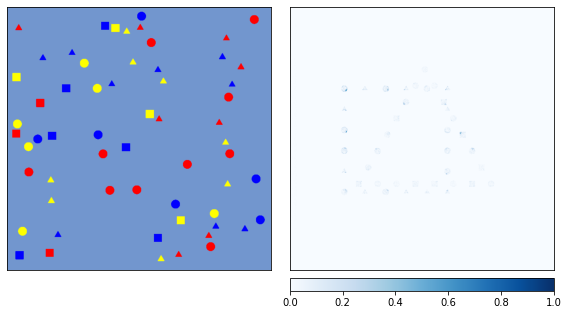

In [ ]:
attributions_gs = attr_gshap(1)[0]
_ = visualization.visualize_image_attr_multiple(np.transpose(attributions_gs.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "absolute_value"],
                                      show_colorbar=True)

46


/usr/local/lib/python3.7/dist-packages/captum/attr/_utils/visualization.py:45: UserWarning: Attempting to normalize by value approximately 0, visualized resultsmay be misleading. This likely means that attribution values are allclose to 0.
  "Attempting to normalize by value approximately 0, visualized results"


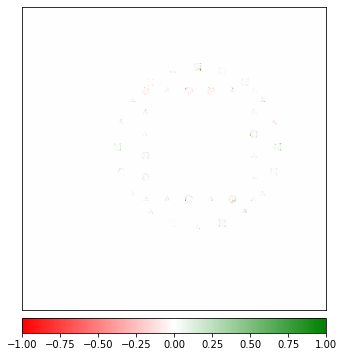

120


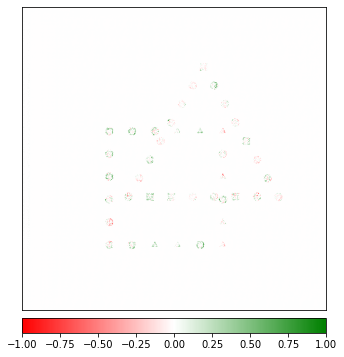

1345


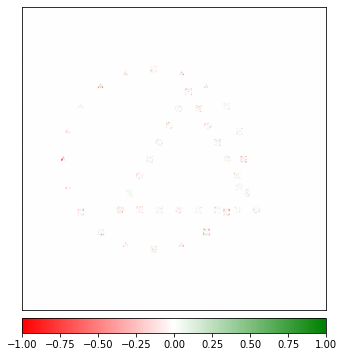

2593


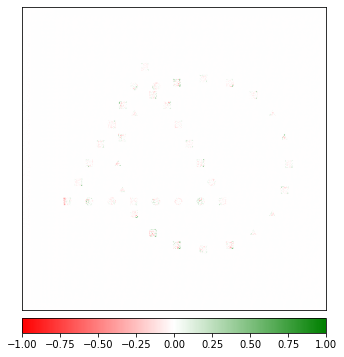

In [ ]:
for o in obs:
    print(o)
    show_attr(attr_gshap(o)[0])

#### Wyjaśnienia - SHAP

46


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:08<00:00, 118.18it/s]


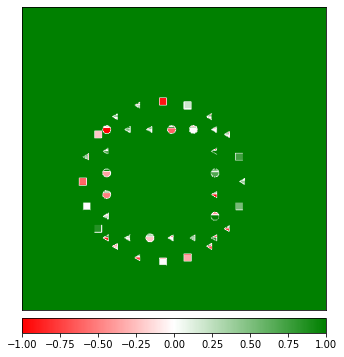

120


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:08<00:00, 116.70it/s]


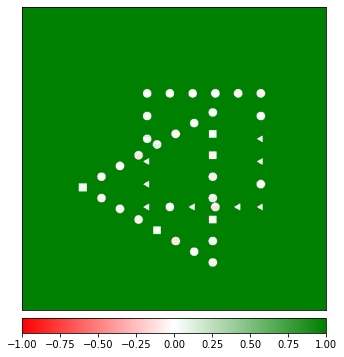

1345


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:08<00:00, 116.04it/s]


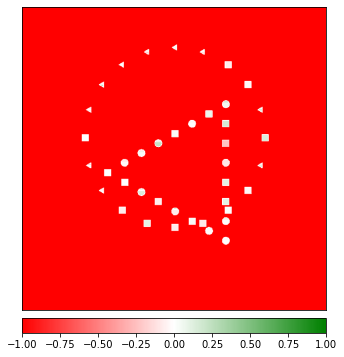

2593


/usr/local/lib/python3.7/dist-packages/captum/attr/_core/lime.py:665: UserWarning: Minimum element in feature mask is not 0, shifting indices to start at 0.
  "Minimum element in feature mask is not 0, shifting indices to"
Kernel Shap attribution: 100%|██████████| 1000/1000 [00:08<00:00, 116.61it/s]


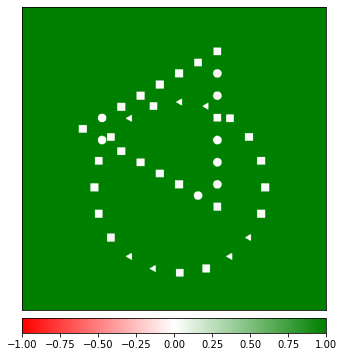

In [ ]:
exp_shap = KernelShap(model_ft)
obs = [46, 120, 1345, 2593]
def attr_shap(i):
    return exp_shap.attribute(
        inputs = get_img(i)[0].unsqueeze(0), 
        target=get_img(i)[1], 
        n_samples=1000, 
        feature_mask=torch.as_tensor(my_segmentation(get_img(i)[0])).to(device),
        show_progress=True,
        baselines = baselines)
for o in obs:
    print(o)
    show_attr(attr_shap(o)[0])